In [326]:
''' in this code, we want to demonstrate how to compute coherence and 
why time lag (phase shift) change coherence'''

' in this code, we want to demonstrate how to compute coherence and \nwhy time lag (phase shift) change coherence'

In [327]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
import math
from scipy import signal

## first lets make a simple signal with same freq components and different phase 


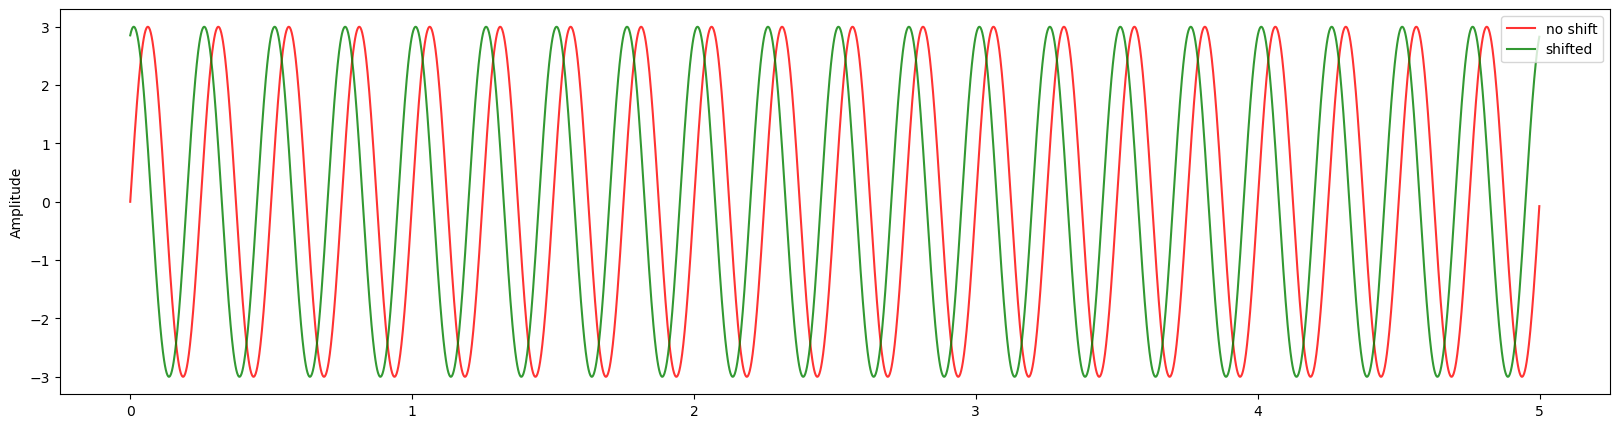

In [337]:

####### test FFT algorithm ##########
# sampling rate
sr = 1000

# sampling interval
dur = 5     # 2 s
L = sr *dur   # signal length
T = 1.0/sr # sampling period
t = np.arange(0,L) * T  # time vector



# make the signals
x= []
freq0 = 4
freq1 = 0 
ph0 = 2/5 * np.pi


x0 = 3*np.sin(2*np.pi*freq0*t)  # to make a simple case, ignore cosine
x1 = 3*np.sin(2*np.pi*freq0*t+ph0) # to make a simple case, ignore cosine

x0 = np.round(x0,3)
x1 = np.round(x1,3)

# x0 += np.sin(2*np.pi*freq1*t)
# x1 += np.sin(2*np.pi*freq1*t)

# freq2 = 23
# x += 0.5* np.sin(2*np.pi*freq2*t)

# # add some noise
# noise0 = np.random.normal(0,1,len(t))
# noise1 =  np.random.normal(0,1,len(t))
# x0 = x+ noise0
# x1 = x + noise1
# X = np.vstack((x0,x1))

plt.figure(figsize = (20, 5))
plt.plot(t, x0, 'r', label = "no shift", alpha = 0.8)
plt.plot(t, x1, 'g', label = "shifted", alpha = 0.8)
plt.legend()

plt.ylabel('Amplitude')
plt.show()


In [338]:
# # let's fft the data

# # compute the two-sided spectrum P2
P1_both = np.abs(Y1/L) #recall that this is by taking the absolute value of the complex fourier coefficient, 
                         #NOT  taking the real part only
Y1 = fft(x0)

# # then compute the single-sided spectrum P1 based on P2a and the real-valued signal length L
P1_single = P1_both[0:int(L/2)]  # 0 Hz included
P1_single[1:] = 2 * P1_single[1:]




# # let's fft the data, recall that this is by taking the absolute value of the complex fourier coefficient
Y2 = fft(x1)
# # compute the two-sided spectrum P2
P2_both = np.abs(Y2/L) #power spectrum

# # then compute the single-sided spectrum P1 based on P2a and the real-valued signal length L
P2_single = P2_both[0:int(L/2)]  # 0 Hz included
P2_single[1:] = 2 * P2_single[1:]


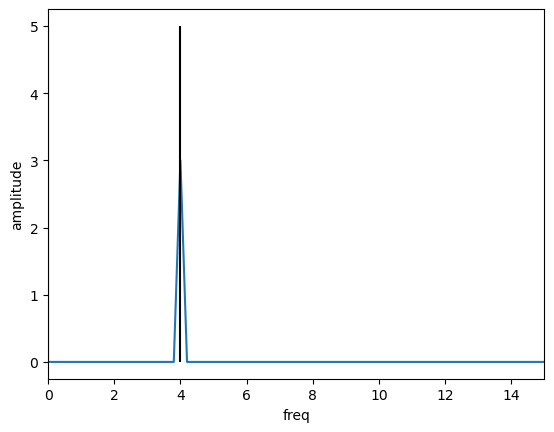

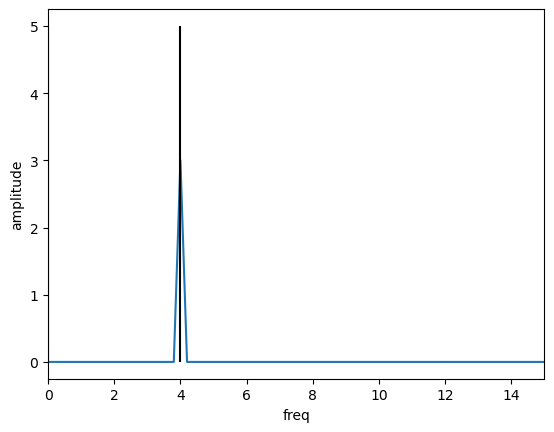

In [345]:
# define the frequency domain f
f = sr * np.arange(0, L/2) /L

plt.figure()
plt.plot(f, P1_single)
plt.xlim(0,15)
plt.vlines(freq0, 0,5 ,'k')
plt.vlines(freq1, 0,5 ,'k')
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.show()

plt.figure()
plt.plot(f, P2_single)
plt.xlim(0,15)
plt.vlines(freq0, 0,5 ,'k')
plt.vlines(freq1, 0,5 ,'k')
plt.xlabel("freq")
plt.ylabel("amplitude")
plt.show()


# Now let's simply show that  shifting in time domain is the same as shifting the phase from a unit circle


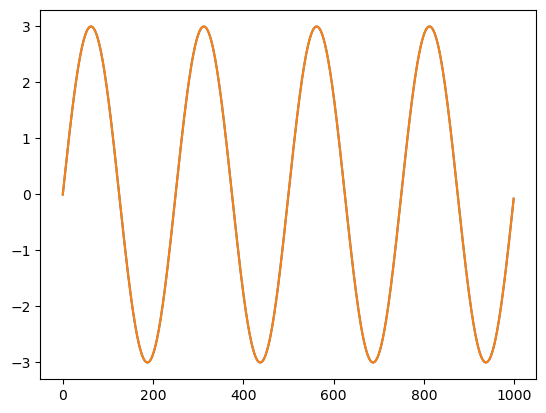

In [340]:
# now let's shift x1 by 200ms, beucase phase1 and phase0 has 2/5*pi difference

plt.plot(x0[1000:2000])
plt.plot(x1[1200:2200])

# we can think of Cxx as spectral cohere as 

## Cxy = abs(Sxy)**2/(Sxx*Syy), where Pxy is the cross-spectral density between acitivies at x and y
## and Sxx and Syy the autospectral densities for two signals
## therefore, withou taking the absolute value they are complex numbers
## therefore, if a second signal is shifted in time domain (aka, phase shifted) naturally the Cxy will be different. 
## recall that phase is defined by both the imaginary and real part of the fourier coefficient: theta = arctan(imag/real), same as magnitude, M = sqrt(real^2 + imag^2)

## we can also re write this in Euler fromat in polar notation and clearly there is a term for for phase difference

## see Mike Cohen's book p344, by definition, coherence is the phase values weighted by power values. See ISPC for more details, showing that the essence of coherence is phase clustering, which of course. That's why in our chat I mentioned when shiting time, phase will shift differntly by frequency (e.g., shifting 500ms is a full 2*pi by 2Hz signal, but it's only shifting pi for 1 Hz signal)


In [360]:
# if two signals are different, the power is  different

bin_f0 = int(freq0 / (sr/L))  # find the bin where freq = freq0


print(P1_both[bin_f0])
print(P2_both[bin_f0])

3.0000000000000004
3.000083419215249


In [362]:
# print the fourier coefficient are also different, even though they show the same peak
print(Y1[bin_f0])
print(Y2[bin_f0])  # clearly they are two differnt points in the complex plane, thus different phase

(-1.234568003383174e-13-7500.20854803812j)
(7133.122213184268-2317.691902700028j)


In [363]:
# another way to think about this is using Euler format, 

# Finally let's simply show that phase difference (shift in time) will change coherence 

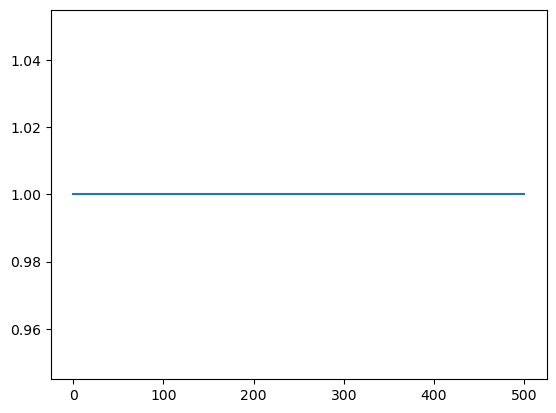

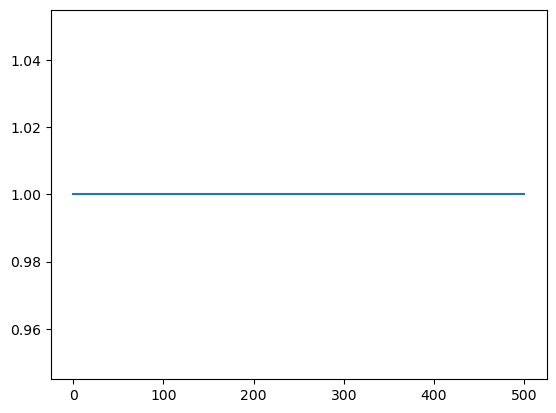

In [367]:
# magnitude squared coherence of same signal, it's 1 
f, Cxy = signal.coherence(x0[1200:2200],x0[1200:2200],fs=1000)
plt.plot(f,Cxy)
plt.show()

# coherence of x1 shifted left (discounting the phase move), it's 1
f, Cxy = signal.coherence(x0[1000:2000],x1[1200:2200],fs=1000)
plt.plot(f,Cxy)
plt.show()


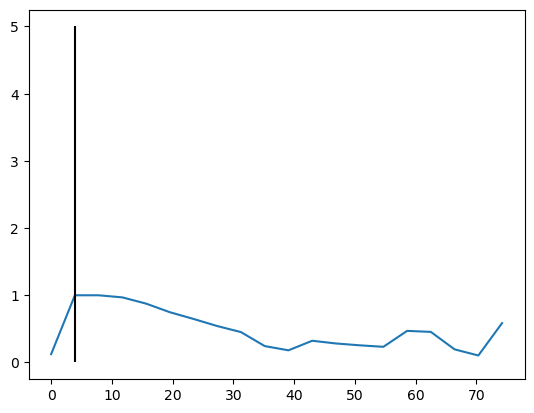

In [372]:
# let's calcuate the coherence of the two signals
f, Cxy = signal.coherence(x0,x1,fs=1000)
plt.plot(f[0:20],Cxy[0:20])
plt.vlines(freq0, 0,5 ,'k')

# we can clearly see the phase change 